In [307]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
stop = stopwords.words('english')

# **Import Clean and Format Data**

Read CSV file, remove unwanted comma characters within the review strings. Reconstruct CSV line; write to new CSV file.

In [309]:
colNames = ""
newLines = []


with open('/content/deception_data_converted_final.csv') as f:
    lines = f.readlines()
    newLines.append(lines[0])
    for line in range(1,len(lines)):
      
      
      x = lines[line].split(',')
      #print("|")
      #print(x[2:len(x)])
      review = ""
      for n in range(2,len(x)):
        x[n].replace(',','')
        review += x[n]
      
      y=x[0]+ ','+x[1] + ',' + review
      #print(y)
      #print("|")
      newLines.append(y)
      f.close()
      



In [310]:
with open(r'/content/deception_data_converted_clean.csv', 'w') as fp:
    for item in newLines:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


# **Instantiate New Dataframe from Clean Data**

In [311]:
df = pd.read_csv('/content/deception_data_converted_clean.csv')

# **Separate the Data By labels**

In [312]:
dfSent = df[['sentiment', 'review']]
dfLie = df[['lie', 'review']]

# **Naive Bayes**

Import required dependencies

In [313]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import train_test_split

import numpy as np

# **Sentiment**

Removal of Stop Words

In [314]:
dfSent['review'] = dfSent['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-314-bc35a5e871f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSent['review'] = dfSent['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


Change Data type of labels to category

In [315]:
dfSent['sentiment'] = dfSent['sentiment'].astype("category")
dfLie['lie'] = dfLie['lie'].astype("category")
dfSent.dtypes

<ipython-input-315-cb8035405524>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSent['sentiment'] = dfSent['sentiment'].astype("category")
<ipython-input-315-cb8035405524>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLie['lie'] = dfLie['lie'].astype("category")


sentiment    category
review         object
dtype: object

Create the test train split (80/20), count vectorize, store labels seperately

In [332]:


count_vec = CountVectorizer()
reviewsArr = count_vec.fit_transform(dfSent['review'].tolist())
bow = np.array(reviewsArr.todense())

x = bow
labels = dfSent['sentiment']

In [333]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, 
                                                    test_size=0.2)

Check Data Types

In [334]:
labels.cat.categories


Index(['n', 'p'], dtype='object')

Fit the Model

In [335]:
modelSent = MultinomialNB().fit(X_train, y_train)
y_pred = modelSent.predict(X_test)


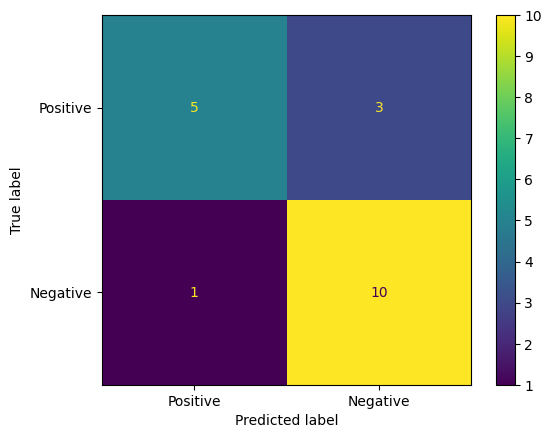

In [336]:
cmlables = ["Positive", "Negative"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cmlables)
disp.plot();

In [337]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           n       0.83      0.62      0.71         8
           p       0.77      0.91      0.83        11

    accuracy                           0.79        19
   macro avg       0.80      0.77      0.77        19
weighted avg       0.80      0.79      0.78        19



# **Lie Detection**

Removal of Stop Words provided a higher accuracy that leaving in place

In [321]:
dfLie['review'] = dfLie['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

<ipython-input-321-56947d643af4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfLie['review'] = dfLie['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


Create the test train split (80/20), count vectorize, store labels seperately

In [338]:


count_vec = CountVectorizer()
reviewsArr = count_vec.fit_transform(dfLie['review'].tolist())
bow = np.array(reviewsArr.todense())

x = bow
labels = dfLie['lie']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(x, labels, 
                                                    test_size=0.2)

Check Data Types

In [340]:
labels.cat.categories

Index(['f', 't'], dtype='object')

Fit the model

In [341]:
modelLie = MultinomialNB().fit(X_train, y_train)
y_pred = modelLie.predict(X_test)


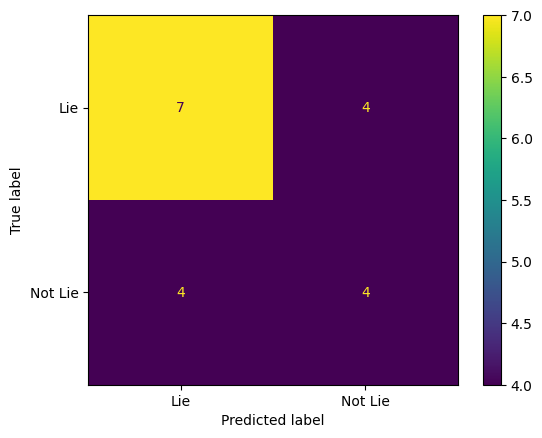

In [342]:
cmlables = ["Lie", "Not Lie"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cmlables)
disp.plot();

In [344]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5789473684210527
              precision    recall  f1-score   support

           f       0.64      0.64      0.64        11
           t       0.50      0.50      0.50         8

    accuracy                           0.58        19
   macro avg       0.57      0.57      0.57        19
weighted avg       0.58      0.58      0.58        19

